<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
    <br/>
<font color=#FF7500>
Sharif University of Technology - Departmenet of Computer Engineering
</font>
<p></p>
<font color=blue>
Artifical Intelligence - Dr. Mohammad Hossein Rohban
</font>
<br/>
<br/>
Fall 2021

</div>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Practical Assignment 3
            	<br/>
			</font>
    <br/>
    <br/>
<font size=4>
			<br/><br/>
Deadline: Azar 18th
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

# Personal Data

In [1]:
# Set your student number
student_number = 98106061
Name = 'Sayyed Mohammad Pourya'
Last_Name = 'Momtaz Isfahani'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**. 
- There is one cell for your custom functions (if you need any) at the beginning of each question. Please note that this jupyter file might be broken down into 3 or 4 jupyter notebooks for easier grading, so you **must write your custom functions in the correct cell**.
- By running the cell below, you can see if your jupyter file is accepted or not. This cell will also **generate a python file which you'll have to upload to Quera** (as well as your jupyter file). The python file will later be validated and if the code in both files doesn't match, **your Practical Assignment won't be graded**.
- This assignment is due Azar 18th 23:59:59. you can use up to 10 grace days for this assignment and the hard deadline is Azar 28th 23:59:59.

In [84]:
# remember to save your jupyter file before running this script
from Helper_codes.validator import *

python_code = extract_python("./questions.ipynb")
with open(f'python_code_{student_number}.py', 'w') as file:
    file.write(python_code)

your jupyter file will be graded


# Q1 (30+5 Points)

<font size=4>
Author: Pooya Moini
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

# Bayesian Networks

In this programming assignment, we will investigate the structure of the binarized MNIST dataset of handwritten digits using Bayesian networks. The dataset contains images of handwritten digits with dimensions $28 \times 28$ (784) pixels. Consider the Bayesian network in Figure 1 . The network contains two layers of variables. The variables in the bottom layer, $X_{1: 784}$ denote the pixel values of the flattened image. The variables in the top layer, $Z_{1}$ and $Z_{2}$, are referred to as latent variables, because the value of these variables will not be explicitly provided by the data and will have to be inferred.

![Figure1](./Images/fig1.png)

The Bayesian network specifies a joint probability distribution over binary images and latent variables $p\left(Z_{1}, Z_{2}, X_{1: 784}\right)$. The model is trained so that the marginal probability of the manifest variables, $p\left(x_{1: 784}\right)=\sum_{z_{1}, z_{2}} p\left(z_{1}, z_{2}, x_{1: 784}\right)$ is high on images that look like digits, and low for other images. 

For this programming assignment, we provide a pretrained model trained_mnist_model. The starter code loads this model and provides functions to directly access the conditional probability tables. Further, we simplify the problem by discretizing the latent and manifest variables such that $\operatorname{Val}\left(Z_{1}\right)=\operatorname{Val}\left(Z_{2}\right)=\{-3,-2.75, \ldots, 2.75,3\}$ and $\operatorname{Val}\left(X_{j}\right)=\{0,1\}$, i.e., the image is binary.

### 1. 
How many values can the random vector $X_{1: 784}$ take, i.e., how many different $28 \times 28$ binary images are there?

How many parameters would you need to specify an arbitrary probability distribution over all possible $28 \times 28$ binary images? (5 points)

In [3]:
'''each binary variable can take two different values so we have 2^784 binary images.
for 784 discrete random variable with two states we need 2^784 - 1 parameters to specify the joint probability distribution.'''

'each binary variable can take two different values so we have 2^784 binary images.\nfor 784 discrete random variable with two states we need 2^784 - 1 parameters to specify the joint probability distribution.'

In [4]:
# extra space

Run below codes to load the network and its functions.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import random
from scipy.io import loadmat


NUM_PIXELS = 28*28

In [6]:
def get_p_z1(z1_val):
    '''
    Helper. Computes the prior probability for variable z1 to take value z1_val.
    P(Z1=z1_val)
    '''
    
    return bayes_net['prior_z1'][z1_val]


def get_p_z2(z2_val):
    '''
    Helper. Computes the prior probability for variable z2 to take value z2_val.
    P(Z2=z2_val)
    '''

    return bayes_net['prior_z2'][z2_val]


In [7]:
def get_p_xk_cond_z1_z2(z1_val, z2_val, k):
    '''
    Helper. Computes the conditional probability that variable xk assumes value 1
    given that z1 assumes value z1_val and z2 assumes value z2_val
    P(Xk = 1 | Z1=z1_val , Z2=z2_val)
    '''

    return bayes_net['cond_likelihood'][(z1_val, z2_val)][0, k-1]


def get_p_x_cond_z1_z2(z1_val, z2_val):
    '''
    Computes the conditional probability of the entire vector x for x = 1,
    given that z1 assumes value z1_val and z2 assumes value z2_val
    '''
    pk = np.zeros(NUM_PIXELS)
    for i in range(NUM_PIXELS):
        pk[i] = get_p_xk_cond_z1_z2(z1_val, z2_val, i+1)
    return pk

In [8]:
def load_model(model_file):
    '''
    Loads a default Bayesian network with latent variables (in this case, a
    variational autoencoder)
    '''

    with open('Helper_codes/trained_mnist_model', 'rb') as infile:
        cpts = pkl.load(infile, encoding='bytes')

    model = {}
    model['prior_z1'] = cpts[0]
    model['prior_z2'] = cpts[1]
    model['cond_likelihood'] = cpts[2]

    return model

In [9]:
global disc_z1, disc_z2
n_disc_z = 25
disc_z1 = np.linspace(-3, 3, n_disc_z)
disc_z2 = np.linspace(-3, 3, n_disc_z)

global bayes_net
bayes_net = load_model('Helper_codes/trained_mnist_model')

### 2.
Produce 5 samples from the joint probability distribution $\left(z_{1}, z_{2}, x_{1: 784}\right) \sim p\left(Z_{1}, Z_{2}, X_{1: 784}\right)$, and plot the corresponding images (values of the pixel variables). (7 points)

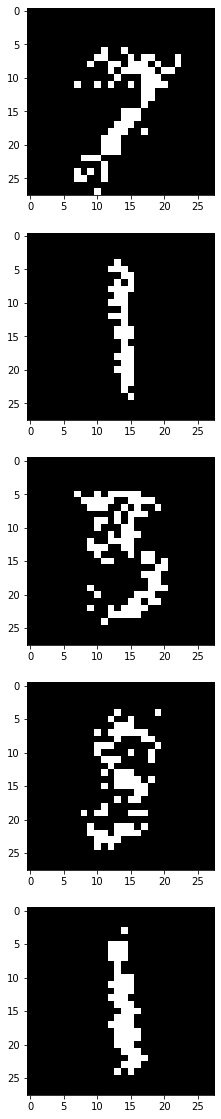

In [14]:
def plot_sample_image():
    z1_prob = []
    z2_prob = []
    for i in disc_z1:
        z1_prob.append(get_p_z1(i))
    for i in disc_z2:
        z2_prob.append(get_p_z2(i))
    z1_val = np.random.choice(disc_z1, p = z1_prob)
    z2_val = np.random.choice(disc_z2, p = z2_prob)
    x = get_p_x_cond_z1_z2(z1_val, z2_val)
    sample = []
    for i in range(784):
        sample.append(np.random.choice([0,1], p = [1-x[i], x[i]]))
    result=[]
    for i in range(28):
        inner = []
        for j in range(28):
            inner.append(sample[28*i+j])
        result.append(inner)
    return result
    


fig, axs = plt.subplots(5, figsize=(20,20))
for i in range(5):
    axs[i].imshow(plot_sample_image(), cmap='gray')
plt.show()

In [15]:
# extra space

### 3.

For each possible value of
$$
\left(\bar{z}_{1}, \bar{z}_{2}\right) \in\{-3,-2.75, \ldots, 2.75,3\} \times\{-3,-2.75, \ldots, 2.75,3\}
$$
compute the conditional expectation $E\left[X_{1: 784} \mid Z_{1}, Z_{2}=\left(\bar{z}_{1}, \bar{z}_{2}\right)\right] .$ This is the expected image corresponding to each possible value of the latent variables $Z_{1}, Z_{2} .$ Plot the images on on a $2 \mathrm{D}$ grid where the grid axes correspond to $Z_{1}$ and $Z_{2}$ respectively. What is the intuitive role of the $Z_{1}, Z_{2}$ variables in this model? (8 points)

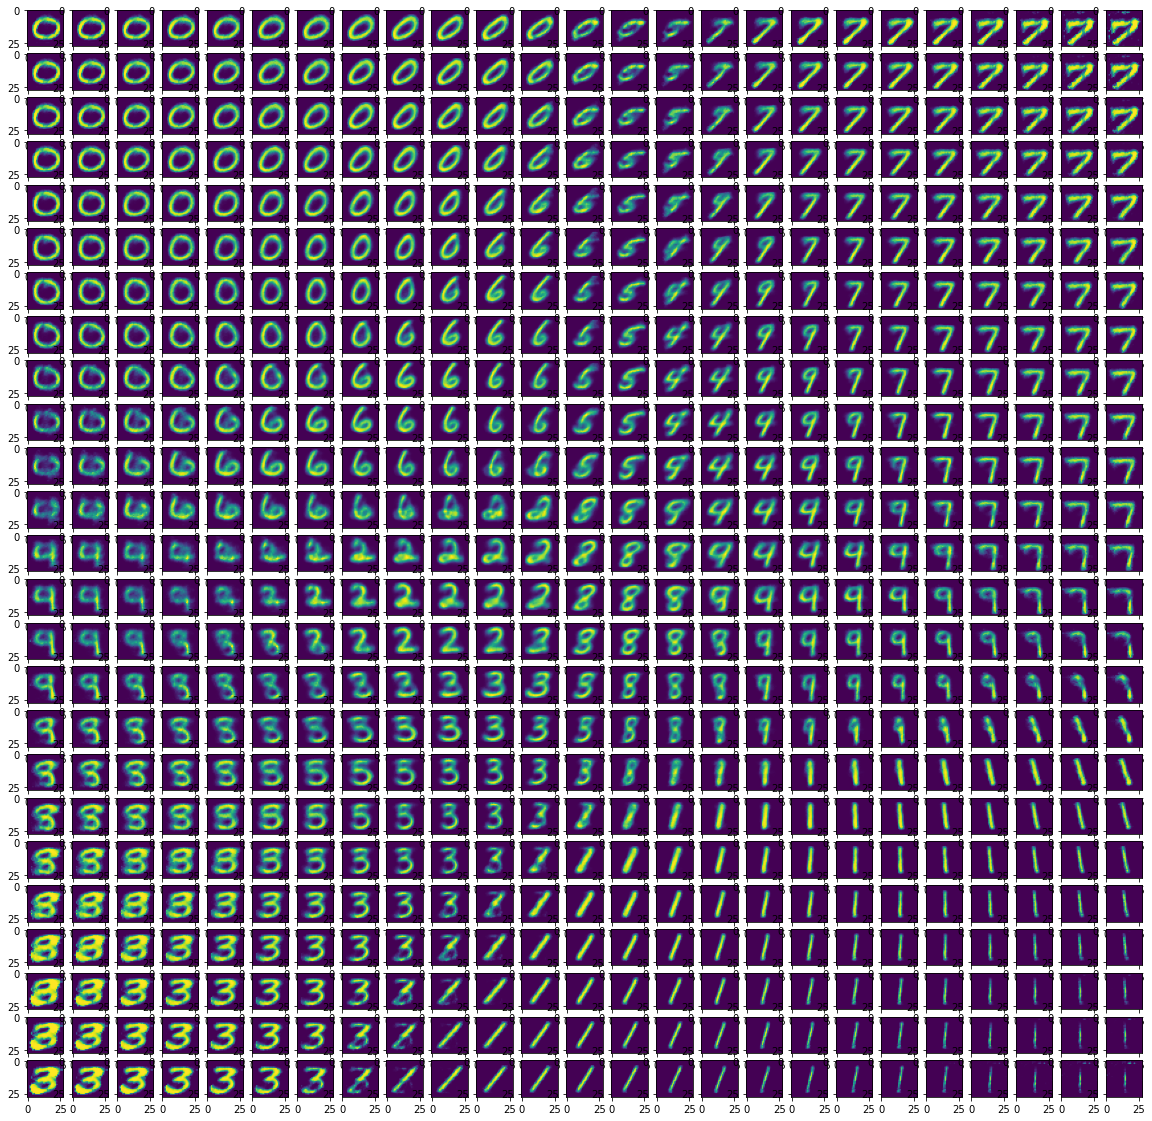

In [16]:
fig, axs = plt.subplots(25,25, figsize=(20,20))
def plot_expected_images():
    for i in disc_z1:
        for j in disc_z2:
            x = get_p_x_cond_z1_z2(i, j)
            result=[]
            for k in range(28):
                inner = []
                for h in range(28):
                    inner.append(x[28*k+h])
                result.append(inner)
            axs[int((i+3)*4)][int((j+3)*4)].imshow(result)
    plt.show()
plot_expected_images()

In [17]:
'''as we can see in plots, z1 somehow indicates curved parts in an image and z2 indicates straight parts in an image.
as we increase z1 we see less curves and as we increse z2 we see more straight shapes.  '''

'as we can see in plots, z1 somehow indicates curved parts in an image and z2 indicates straight parts in an image.\nas we increase z1 we see less curves and as we increse z2 we see more straight shapes.  '

In [18]:
mat = loadmat('Helper_codes/testval.mat')
val_data = mat['val_x']
test_data = mat['test_x']

### 4.
You are given a validation and a test dataset. In the test dataset, some images are "real" handwritten digits, and some are anomalous (corrupted images). We would like to use our Bayesian network to distinguish real images from the anomalous ones. Intuitively, our Bayesian network should assign low probability to corrupted images and high probability to the real ones, and we can use this for classification. To do this, we first compute the average marginal log-likelihood,
$$
\log p\left(x_{1: 784}\right)=\log \sum_{z_{1}} \sum_{z_{2}} p\left(z_{1}, z_{2}, x_{1: 784}\right)
$$
on the validation dataset, and the standard deviation (again, standard deviation over the validation set). Consider a simple prediction rule where images with marginal log-likelihood, $\log p\left(x_{1: 784}\right)$, outside three standard deviations of the average marginal log-likelihood are classified as corrupted. Classify images in the test set as corrupted or real using this rule. Then plot a histogram of the marginal log-likelihood for the images classified as "real". Plot a separate histogram of the marginal log-likelihood for the images classified as "corrupted". (15 points)

In [19]:
def plot_histo():
    x_prob = []
    z1_z2_prob = []
    for i in disc_z1 :
        for j in disc_z2:
            index = ((i+3)*4) * 25 + ((j+3)*4)
            z1_z2_prob.append(get_p_z1(i) * get_p_z2(j))
            x_prob.append(get_p_x_cond_z1_z2(i, j))
    likelihoods = []
    for i in val_data:
        products = []
        for num1, list2 in zip(z1_z2_prob, x_prob):
            product = []
            temp = np.ones(NUM_PIXELS)
            product = np.where(i, list2, np.subtract(temp,list2))
            product = np.prod(product)
            products.append(num1 * product)
        likelihoods.append(np.log(np.sum(products)))
    val_likelihood_mean = np.mean(likelihoods)
    val_likelihood_std = np.std(likelihoods)

    likelihoods = []
    for i in test_data:
        products = []
        for num1, list2 in zip(z1_z2_prob, x_prob):
            product = []
            temp = np.ones(NUM_PIXELS)
            product = np.where(i, list2, np.subtract(temp,list2))
            product = np.prod(np.double(product))
            products.append(np.double(num1 * product))
        sum = np.sum(np.double(products))
        log_val = np.log(np.double(sum))
        likelihoods.append(log_val)
    

    flag = np.abs(np.array(likelihoods) - val_likelihood_mean) <= (3 * val_likelihood_std)
    reals = []
    corrupts = []
    for i in range(len(flag)):
        if likelihoods[i] == float('-inf'): 
            likelihoods[i] = -1000
        if flag[i]:
            reals.append(likelihoods[i])
        else:
            corrupts.append(likelihoods[i])
    plt.figure()
    plt.hist(reals)
    plt.show()
    plt.figure()
    plt.hist(corrupts)
    plt.show()

C:\Users\13980611\AppData\Local\Temp/ipykernel_27544/891823701.py:32: RuntimeWarning: divide by zero encountered in log
  log_val = np.log(np.double(sum))


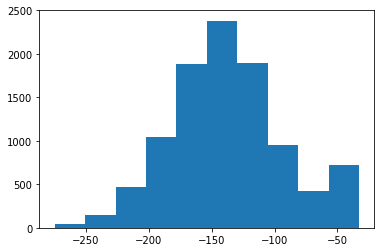

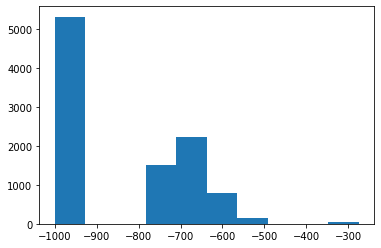

In [20]:
plot_histo()

In [ ]:
# extra space

---

# Q2 (40 Points)

<font size=4>
Author: Mohammad Mahdi Asmae
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

# Sampling in Bayesian Network

In this assignment, we will implement diffrent methods of sampling and try to compare the methods by varying queries and number of samples. In the next section you will implement Bayesian Network as a Python class with these methods:

* CPT: returns conditional probability table of nodes
* PMF: returns probability mass function of given query
* Sampling: implementation of different sampling methods
    
We will use following BN in this problem.

<img src="Images/BN.png" width=1400 height=1200 />

In [36]:
np.random.seed(0)

In [37]:
# extra space

In [38]:
# extra space

In [39]:
class BN(object):
    def __init__(self) -> None:
        self.n = 7
        self.G = {'A':[['C','D'],[]], 'B':[['E'],[]], 'C':[['D','G'],['A','E']], 'D':[['F','G'],['A','C']], 'E':[['C','G'],['B']], 'F':[[],['D']], 'G':[[],['C','D','E']]}
        self.CPTs={ 'A':{ 0 : { () : 0.2},
                          1 : { () : 0.8}},
                    'B':{ 0 : { () : 0.45},
                          1 : { () : 0.55}},
                    'C':{ 0 : { (('A',0), ('E',0)) : 0.3, (('A',1), ('E',0)) : 0.5, (('A',0), ('E',1)) : 0.85, (('A',1), ('E',1)) : 0.95 },
                          1 : { (('A',0), ('E',0)) : 0.7, (('A',1), ('E',0)) : 0.5, (('A',0), ('E',1)) : 0.15, (('A',1), ('E',1)) : 0.05 }},
                    'D':{ 0 : { (('A',0), ('C',0)) : 0.2, (('A',1), ('C',0)) : 0.5, (('A',0), ('C',1)) : 0.35, (('A',1), ('C',1)) : 0.33 },
                          1 : { (('A',0), ('C',0)) : 0.8, (('A',1), ('C',0)) : 0.5, (('A',0), ('C',1)) : 0.65, (('A',1), ('C',1)) : 0.67 }},
                    'E':{ 0 : { (('B',0),) : 0.1, (('B',1),) : 0.7},
                          1 : { (('B',0),) : 0.9, (('B',1),) : 0.3}},
                    'F':{ 0 : { (('D',0),) : 0.75, (('D',1),) : 0.8},
                          1 : { (('D',0),) : 0.25, (('D',1),) : 0.2}},
                    'G':{ 0 : { (('C',0), ('D',0), ('E',0)) : 0.5, (('C',0), ('D',0), ('E',1)) : 0.5, (('C',0), ('D',1), ('E',0)) : 0.5, (('C',0), ('D',1), ('E',1)) : 0.5, (('C',1), ('D',0), ('E',0)) : 0.5, (('C',1), ('D',0), ('E',1)) : 0.5, (('C',1), ('D',1), ('E',0)) : 0.5, (('C',1), ('D',1), ('E',1)) : 0.5 },
                          1 : { (('C',0), ('D',0), ('E',0)) : 0.5, (('C',0), ('D',0), ('E',1)) : 0.5, (('C',0), ('D',1), ('E',0)) : 0.5, (('C',0), ('D',1), ('E',1)) : 0.5, (('C',1), ('D',0), ('E',0)) : 0.5, (('C',1), ('D',0), ('E',1)) : 0.5, (('C',1), ('D',1), ('E',0)) : 0.5, (('C',1), ('D',1), ('E',1)) : 0.5 }}}
        
        pass
    
    def cpt(self, node, value) -> dict:
        node_cpt = self.CPTs.get(node)
        node_value_cpt = node_cpt.get(value)
        return node_value_cpt

    
    def pmf(self, query, evidence) -> float:
        node = query[0]
        value = query[1]
        cpt = self.cpt(node, value)
        keys = list(cpt.keys())
        dependant_list = list(dict(keys[0]).keys())
        evidence = list(filter(lambda key: key[0] in dependant_list , evidence.items()))
        for e in evidence:
            cpt = dict(list(filter(lambda key: e in key[0] , cpt.items())))
        return np.sum(list(cpt.values())) / len(cpt.keys())
        pass

    def prior_sampling(self, num_iter):
        topological_sort=['A', 'B', 'E', 'C', 'D', 'F', 'G']
        sample = {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0}
        samples = []
        for i in range(num_iter):
            for variable in topological_sort:
                parents = (self.G.get(variable))[1]
                parents_value = tuple(filter(lambda key: key[0] in parents , sample.items()))
                var_cpt = self.cpt(variable, 1)
                one_prob = var_cpt.get(parents_value)
                zero_prob = 1 - one_prob
                var_sample_value = np.random.choice(np.arange(0, 2), p=[zero_prob, one_prob])
                sample[variable] = var_sample_value
            samples.append(sample.copy())
        return samples

    def rejection_sampling(self, num_iter, evidence):
        topological_sort=['A', 'B', 'E', 'C', 'D', 'F', 'G']
        sample = {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0}
        samples = []
        cnt = num_iter
        while cnt > 0:
            flag = 0
            for variable in topological_sort:
                parents = (self.G.get(variable))[1]
                parents_value = tuple(filter(lambda key: key[0] in parents , sample.items()))
                var_cpt = self.cpt(variable, 1)
                one_prob = var_cpt.get(parents_value)
                zero_prob = 1 - one_prob
                var_sample_value = np.random.choice(np.arange(0, 2), p=[zero_prob, one_prob])
                if variable in evidence.keys():
                    if evidence.get(variable) != var_sample_value:
                        flag = 1
                        break
                sample[variable] = var_sample_value
            if flag == 0:
                samples.append(sample.copy())
                cnt -= 1
        return samples

    def likelihood_sampling(self, num_iter, evidence):
        topological_sort=['A', 'B', 'E', 'C', 'D', 'F', 'G']
        sample = {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0}
        samples = []
        for i in range(num_iter):
            weight = 1
            for variable in topological_sort:
                parents = (self.G.get(variable))[1]
                parents_value = tuple(filter(lambda key: key[0] in parents , sample.items()))
                var_cpt = self.cpt(variable, 1)
                one_prob = var_cpt.get(parents_value)
                zero_prob = 1 - one_prob
                if variable in evidence.keys():
                    ev_val = evidence.get(variable)
                    sample[variable] = ev_val
                    if ev_val == 1:
                        weight *= one_prob
                    else:
                        weight *= zero_prob
                else:
                    var_sample_value = np.random.choice(np.arange(0, 2), p=[zero_prob, one_prob])
                    sample[variable] = var_sample_value
            samples.append((sample.copy(),weight))
        return samples

    def gibbs_sampling(self, num_iter, num_burnin, evidence):
        topological_sort=['A', 'B', 'E', 'C', 'D', 'F', 'G']
        topological_sort = list(filter(lambda key: not(key in evidence.keys()),topological_sort))
        sample = {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0}
        for key in evidence.keys():
                sample[key] = evidence.get(key)
        for variable in topological_sort:
            sample[variable] = np.random.choice([0,1])
        samples = []
        cnt = num_burnin
        for i in range(int(num_iter + num_burnin)):
            for variable in topological_sort:
                sample.pop(variable)
                one_prob = self.pmf((variable, 1),sample)
                zero_prob = 1 - one_prob
                var_sample_value = np.random.choice(np.arange(0, 2), p=[zero_prob, one_prob])
                sample[variable] = var_sample_value
            if cnt == 0:
                samples.append(sample.copy())
            else:
                cnt -= 1
        return samples
    
    def sampling(self, query, evidence, sampling_method, num_iter, num_burnin = 1e2) -> float:
        if sampling_method == 'Prior':
            samples = self.prior_sampling(num_iter)
            samples = list(filter(lambda sample: all(item in sample.items() for item in evidence.items()) , samples))
            accepted = list(filter(lambda sample: all(item in sample.items() for item in query.items()) , samples))
            if len(samples) == 0:
                return 0
            return len(accepted) / len(samples)
        elif sampling_method == 'Rejection':
            samples = self.rejection_sampling(num_iter, evidence)
            accepted = list(filter(lambda sample: all(item in sample.items() for item in query.items()) , samples))
            return len(accepted) / len(samples)
        elif sampling_method == 'Likelihood':
            samples = self.likelihood_sampling(num_iter, evidence)
            accepted = list(filter(lambda sample: all(item in sample[0].items() for item in query.items()) , samples))
            sum_weight_samples = 0
            for i in samples:
                sum_weight_samples += i[1]
            sum_weight_accepted = 0
            for i in accepted:
                sum_weight_accepted += i[1]
            return sum_weight_accepted / sum_weight_samples
        elif sampling_method == 'Gibbs':
            samples = self.gibbs_sampling(num_iter, num_burnin, evidence)
            accepted = list(filter(lambda sample: all(item in sample.items() for item in query.items()) , samples))
            return len(accepted) / len(samples)
        pass
    
    

In [40]:
# extra space

In [41]:
# extra space

In [42]:
# extra space

In this part you will compare sampling results with real probabilities for these settings:

* query: $P(F=1|A=1,E=0)$ , $P(C=0,B=1|F=1,D=0)$
* number of samples: 100, 500, 1000, 3000, 10000, 50000

First find the probabilities with inference methods, then find the approximate probabilities for the queries with sampling methods with different number of samples. At the end, you will plot errors of diffrent methods by number of samples.

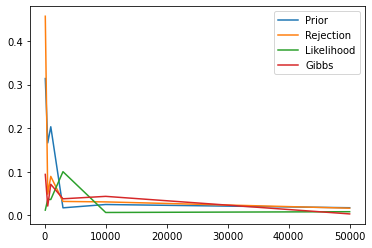

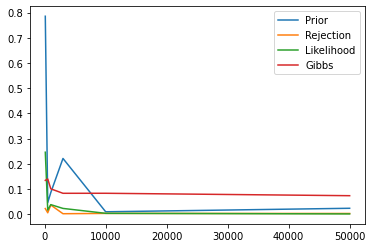

In [43]:
def get_error(approx, real):
    return np.abs(real - approx) / real
BN_temp = BN()
real_prob_query1 = 0.22075
real_prob_query2 = 0.35827

x1 = [100, 500, 1000, 3000, 10000, 50000]
y1 = [get_error(BN_temp.sampling({'F': 1}, {'A': 1 , 'E' : 0}, 'Prior', 100), real_prob_query1),
      get_error(BN_temp.sampling({'F': 1}, {'A': 1 , 'E' : 0}, 'Prior', 500), real_prob_query1),
      get_error(BN_temp.sampling({'F': 1}, {'A': 1 , 'E' : 0}, 'Prior', 1000), real_prob_query1),
      get_error(BN_temp.sampling({'F': 1}, {'A': 1 , 'E' : 0}, 'Prior', 3000), real_prob_query1),
      get_error(BN_temp.sampling({'F': 1}, {'A': 1 , 'E' : 0}, 'Prior', 10000), real_prob_query1),
      get_error(BN_temp.sampling({'F': 1}, {'A': 1 , 'E' : 0}, 'Prior', 50000), real_prob_query1)]
y2 = [get_error(BN_temp.sampling({'F': 1}, {'A': 1 , 'E' : 0}, 'Rejection', 100), real_prob_query1),
      get_error(BN_temp.sampling({'F': 1}, {'A': 1 , 'E' : 0}, 'Rejection', 500), real_prob_query1),
      get_error(BN_temp.sampling({'F': 1}, {'A': 1 , 'E' : 0}, 'Rejection', 1000), real_prob_query1),
      get_error(BN_temp.sampling({'F': 1}, {'A': 1 , 'E' : 0}, 'Rejection', 3000), real_prob_query1),
      get_error(BN_temp.sampling({'F': 1}, {'A': 1 , 'E' : 0}, 'Rejection', 10000), real_prob_query1),
      get_error(BN_temp.sampling({'F': 1}, {'A': 1 , 'E' : 0}, 'Rejection', 50000), real_prob_query1)]
y3 = [get_error(BN_temp.sampling({'F': 1}, {'A': 1 , 'E' : 0}, 'Likelihood', 100), real_prob_query1),
      get_error(BN_temp.sampling({'F': 1}, {'A': 1 , 'E' : 0}, 'Likelihood', 500), real_prob_query1),
      get_error(BN_temp.sampling({'F': 1}, {'A': 1 , 'E' : 0}, 'Likelihood', 1000), real_prob_query1),
      get_error(BN_temp.sampling({'F': 1}, {'A': 1 , 'E' : 0}, 'Likelihood', 3000), real_prob_query1),
      get_error(BN_temp.sampling({'F': 1}, {'A': 1 , 'E' : 0}, 'Likelihood', 10000), real_prob_query1),
      get_error(BN_temp.sampling({'F': 1}, {'A': 1 , 'E' : 0}, 'Likelihood', 50000), real_prob_query1)]
y4 = [get_error(BN_temp.sampling({'F': 1}, {'A': 1 , 'E' : 0}, 'Gibbs', 100), real_prob_query1),
      get_error(BN_temp.sampling({'F': 1}, {'A': 1 , 'E' : 0}, 'Gibbs', 500), real_prob_query1),
      get_error(BN_temp.sampling({'F': 1}, {'A': 1 , 'E' : 0}, 'Gibbs', 1000), real_prob_query1),
      get_error(BN_temp.sampling({'F': 1}, {'A': 1 , 'E' : 0}, 'Gibbs', 3000), real_prob_query1),
      get_error(BN_temp.sampling({'F': 1}, {'A': 1 , 'E' : 0}, 'Gibbs', 10000), real_prob_query1),
      get_error(BN_temp.sampling({'F': 1}, {'A': 1 , 'E' : 0}, 'Gibbs', 50000), real_prob_query1)]

plt.plot(x1, y1)
plt.plot(x1, y2)
plt.plot(x1, y3)
plt.plot(x1, y4)
plt.legend(["Prior", "Rejection", "Likelihood", "Gibbs"])
plt.show()

x1 = [100, 500, 1000, 3000, 10000, 50000]
y1 = [get_error(BN_temp.sampling({'C': 0, 'B': 1}, {'F': 1 , 'D' : 0}, 'Prior', 100), real_prob_query2),
      get_error(BN_temp.sampling({'C': 0, 'B': 1}, {'F': 1 , 'D' : 0}, 'Prior', 500), real_prob_query2),
      get_error(BN_temp.sampling({'C': 0, 'B': 1}, {'F': 1 , 'D' : 0}, 'Prior', 1000), real_prob_query2),
      get_error(BN_temp.sampling({'C': 0, 'B': 1}, {'F': 1 , 'D' : 0}, 'Prior', 3000), real_prob_query2),
      get_error(BN_temp.sampling({'C': 0, 'B': 1}, {'F': 1 , 'D' : 0}, 'Prior', 10000), real_prob_query2),
      get_error(BN_temp.sampling({'C': 0, 'B': 1}, {'F': 1 , 'D' : 0}, 'Prior', 50000), real_prob_query2)]
y2 = [get_error(BN_temp.sampling({'C': 0, 'B': 1}, {'F': 1 , 'D' : 0}, 'Rejection', 100), real_prob_query2),
      get_error(BN_temp.sampling({'C': 0, 'B': 1}, {'F': 1 , 'D' : 0}, 'Rejection', 500), real_prob_query2),
      get_error(BN_temp.sampling({'C': 0, 'B': 1}, {'F': 1 , 'D' : 0}, 'Rejection', 1000), real_prob_query2),
      get_error(BN_temp.sampling({'C': 0, 'B': 1}, {'F': 1 , 'D' : 0}, 'Rejection', 3000), real_prob_query2),
      get_error(BN_temp.sampling({'C': 0, 'B': 1}, {'F': 1 , 'D' : 0}, 'Rejection', 10000), real_prob_query2),
      get_error(BN_temp.sampling({'C': 0, 'B': 1}, {'F': 1 , 'D' : 0}, 'Rejection', 50000), real_prob_query2)]
y3 = [get_error(BN_temp.sampling({'C': 0, 'B': 1}, {'F': 1 , 'D' : 0}, 'Likelihood', 100), real_prob_query2),
      get_error(BN_temp.sampling({'C': 0, 'B': 1}, {'F': 1 , 'D' : 0}, 'Likelihood', 500), real_prob_query2),
      get_error(BN_temp.sampling({'C': 0, 'B': 1}, {'F': 1 , 'D' : 0}, 'Likelihood', 1000), real_prob_query2),
      get_error(BN_temp.sampling({'C': 0, 'B': 1}, {'F': 1 , 'D' : 0}, 'Likelihood', 3000), real_prob_query2),
      get_error(BN_temp.sampling({'C': 0, 'B': 1}, {'F': 1 , 'D' : 0}, 'Likelihood', 10000), real_prob_query2),
      get_error(BN_temp.sampling({'C': 0, 'B': 1}, {'F': 1 , 'D' : 0}, 'Likelihood', 50000), real_prob_query2)]
y4 = [get_error(BN_temp.sampling({'C': 0, 'B': 1}, {'F': 1 , 'D' : 0}, 'Gibbs', 100), real_prob_query2),
      get_error(BN_temp.sampling({'C': 0, 'B': 1}, {'F': 1 , 'D' : 0}, 'Gibbs', 500), real_prob_query2),
      get_error(BN_temp.sampling({'C': 0, 'B': 1}, {'F': 1 , 'D' : 0}, 'Gibbs', 1000), real_prob_query2),
      get_error(BN_temp.sampling({'C': 0, 'B': 1}, {'F': 1 , 'D' : 0}, 'Gibbs', 3000), real_prob_query2),
      get_error(BN_temp.sampling({'C': 0, 'B': 1}, {'F': 1 , 'D' : 0}, 'Gibbs', 10000), real_prob_query2),
      get_error(BN_temp.sampling({'C': 0, 'B': 1}, {'F': 1 , 'D' : 0}, 'Gibbs', 50000), real_prob_query2)]

plt.plot(x1, y1)
plt.plot(x1, y2)
plt.plot(x1, y3)
plt.plot(x1, y4)
plt.legend(["Prior", "Rejection", "Likelihood", "Gibbs"])
plt.show()

In [44]:
# extra space

In [45]:
# extra space

For Gibbs sampling, try diffrent burnin values and report the accuracy (or error).

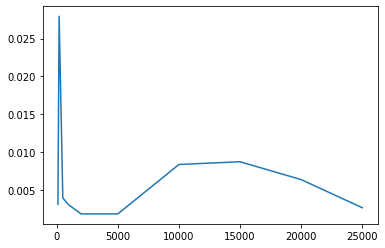

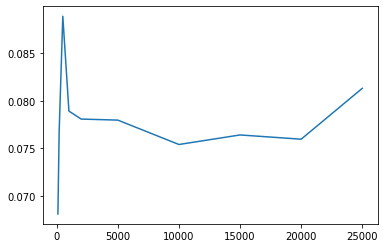

In [49]:
x1 = [100, 200, 500, 1000, 2000, 5000, 10000, 15000, 20000, 25000]
y1 = [get_error(BN_temp.sampling({'F': 1}, {'A': 1 , 'E' : 0}, 'Gibbs', 50000, 100), real_prob_query1),
      get_error(BN_temp.sampling({'F': 1}, {'A': 1 , 'E' : 0}, 'Gibbs', 50000, 200), real_prob_query1),
      get_error(BN_temp.sampling({'F': 1}, {'A': 1 , 'E' : 0}, 'Gibbs', 50000, 500), real_prob_query1),
      get_error(BN_temp.sampling({'F': 1}, {'A': 1 , 'E' : 0}, 'Gibbs', 50000, 1000), real_prob_query1),
      get_error(BN_temp.sampling({'F': 1}, {'A': 1 , 'E' : 0}, 'Gibbs', 50000, 2000), real_prob_query1),
      get_error(BN_temp.sampling({'F': 1}, {'A': 1 , 'E' : 0}, 'Gibbs', 50000, 5000), real_prob_query1),
      get_error(BN_temp.sampling({'F': 1}, {'A': 1 , 'E' : 0}, 'Gibbs', 50000, 10000), real_prob_query1),
      get_error(BN_temp.sampling({'F': 1}, {'A': 1 , 'E' : 0}, 'Gibbs', 50000, 15000), real_prob_query1),
      get_error(BN_temp.sampling({'F': 1}, {'A': 1 , 'E' : 0}, 'Gibbs', 50000, 20000), real_prob_query1),
      get_error(BN_temp.sampling({'F': 1}, {'A': 1 , 'E' : 0}, 'Gibbs', 50000, 25000), real_prob_query1)]
plt.plot(x1, y1)
plt.show()

x1 = [100, 200, 500, 1000, 2000, 5000, 10000, 15000, 20000, 25000]
y1 = [get_error(BN_temp.sampling({'C': 0, 'B': 1}, {'F': 1 , 'D' : 0}, 'Gibbs', 50000, 100), real_prob_query2),
      get_error(BN_temp.sampling({'C': 0, 'B': 1}, {'F': 1 , 'D' : 0}, 'Gibbs', 50000, 200), real_prob_query2),
      get_error(BN_temp.sampling({'C': 0, 'B': 1}, {'F': 1 , 'D' : 0}, 'Gibbs', 50000, 500), real_prob_query2),
      get_error(BN_temp.sampling({'C': 0, 'B': 1}, {'F': 1 , 'D' : 0}, 'Gibbs', 50000, 1000), real_prob_query2),
      get_error(BN_temp.sampling({'C': 0, 'B': 1}, {'F': 1 , 'D' : 0}, 'Gibbs', 50000, 2000), real_prob_query2),
      get_error(BN_temp.sampling({'C': 0, 'B': 1}, {'F': 1 , 'D' : 0}, 'Gibbs', 50000, 5000), real_prob_query2),
      get_error(BN_temp.sampling({'C': 0, 'B': 1}, {'F': 1 , 'D' : 0}, 'Gibbs', 50000, 10000), real_prob_query2),
      get_error(BN_temp.sampling({'C': 0, 'B': 1}, {'F': 1 , 'D' : 0}, 'Gibbs', 50000, 15000), real_prob_query2),
      get_error(BN_temp.sampling({'C': 0, 'B': 1}, {'F': 1 , 'D' : 0}, 'Gibbs', 50000, 20000), real_prob_query2),
      get_error(BN_temp.sampling({'C': 0, 'B': 1}, {'F': 1 , 'D' : 0}, 'Gibbs', 50000, 25000), real_prob_query2)]
plt.plot(x1, y1)
plt.show()

In [50]:
# extra space

In [51]:
# extra space

# Q3 (20+ 5 Points)

<font size=4>
Author: Kian Bakhtari
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

## The Puerto Princesa ship

At midnight on a fall day in the Philippines, a ship leaves Puerto Princesa City's seaport to Macao, China. After one or two hours, the boat loses its GPS connection because of a technical issue. Captain keeps navigating the ship to its destination, using the stars and four old radio towers, which you can see on the map. Each antenna could measure the ship's coordinates (X, Y) and send them to its receiver. There are five records of towers signals at five different times, available for you in the records.json file. Also, the boat's actual coordinates are available in the real_coordinates.json file. The exact coordinates are ONLY FOR EVALUATION PURPOSES, and you CAN NOT use them as input data. The five dots on the map below are actual coordinates of the ship, at each time step where the records from antennas were received. Also, the map is decorative and is not part of the data.

![Figure3-1](./Images/map.png)

Each tower has a noise that is coming from a gaussian distribution, meaning that every (X, Y) pair that is received from an antenna is actually derived from:

X = sample_from_normal_distribution(mean = X_real, std = antenna's std)
Y = sample_from_normal_distribution(mean = Y_real, std = antenna's std)

Information of radio towers (coordinate and noise standard deviation) is available in the towers_info.json file.

The ship's movement between those five different time steps could be mathematically modeled as follows:
At each time step, the ship moves D units to the north and F units to either east or west (half of the times west, and half of the times east). D and F are both samples from exponential distributions with a scale of Y_STEP and X_STEP, respectively. Those parameters are available in the moving_model.json file.

### Hidden Markov Model

At this point, you can build a simple HMM and estimate the ship's coordinates using the conditional probabilities that you have. For each time step, calculate the ship's coordinates at that time step and previous time steps, using the tower records received up to that time. In simpler words, calculate:<br>

P(coor_0 | records_0)<br>
P(coor_1 | records_0, records_1)<br>
...<br>
P(coor_4 | records_0, records_1, records_2, records_3, records_4)<br>


The actual coordinates of the ship in the first time step (coor_0) is coming from a 2-dimensional guassian distribution with the mean of Puerto Princesa city's coordinates and covarianve matrix of INIT_COV (scalar) times the identity matrix. INIT_COV and coordinates of Puerto Princesa city is availabel in moving_model.json file.

## Libraries

In [52]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import json

from scipy.stats import norm, expon
import scipy
import pandas as pd

## Data

In [53]:
real_coordinates = json.load(open('./inputs/real_coordinates.json'))
pd.DataFrame(real_coordinates)

,X,Y
0,1087.233417,-57.165368
1,1044.936241,72.343990
2,967.051182,392.826826
3,314.440277,1219.678719
4,590.424895,1413.279887


In [54]:
towers_info = json.load(open('./inputs/towers_info.json'))
pd.DataFrame(towers_info)

,1,2,3,4
x,1405,10,210,630
y,600,880,1890,2090
std,60,110,90,80


In [55]:
moving_model = json.load(open('./inputs/moving_model.json'))
moving_model

{'X_STEP': 300,
 'Y_STEP': 600,
 'INIT_COV': 200,
 'Peurto_coordinates': [1105, -50]}

In [56]:
records = json.load(open('./inputs/records.json'))
pd.DataFrame(records)

,Tower1,Tower2,Tower3,Tower4
0,"[994, -36]","[873, -28]","[958, 70]","[1077, -128]"
1,"[1053, 63]","[926, 26]","[961, 110]","[905, 82]"
2,"[956, 389]","[1106, 499]","[1005, 397]","[901, 326]"
3,"[331, 1227]","[377, 1232]","[270, 1282]","[232, 1051]"
4,"[520, 1376]","[577, 1446]","[397, 1456]","[648, 1364]"


## Functions

In [57]:
tower_records = [(records.get('Tower1')[i],
                  records.get('Tower2')[i], 
                  records.get('Tower3')[i], 
                  records.get('Tower4')[i]) for i in range(5)]

In [58]:
tower_records

[([994, -36], [873, -28], [958, 70], [1077, -128]),
 ([1053, 63], [926, 26], [961, 110], [905, 82]),
 ([956, 389], [1106, 499], [1005, 397], [901, 326]),
 ([331, 1227], [377, 1232], [270, 1282], [232, 1051]),
 ([520, 1376], [577, 1446], [397, 1456], [648, 1364])]

In [59]:
# extra space

In [60]:
# extra space

In [61]:
def get_mean_towers_coor(time_step: int, tower_records: list):
    # The average of all four towers measurements at a given time step
    x = np.average([tower_coor[0] for tower_coor in tower_records[time_step]])
    y = np.average([tower_coor[1] for tower_coor in tower_records[time_step]])
    return x, y


def P_coor0(coor0):
    # Distribuiton of initial coordinates (time step 0)
    x0, y0 = coor0
    return scipy.stats.multivariate_normal.pdf([x0, y0], 
                            mean=moving_model.get('Peurto_coordinates'), cov=moving_model.get('INIT_COV'))


# filling these three functions with apropriate codes: (2 points)

def P_coor_given_prevCoor(coor, prev_coor):
    # Probability of coordinates at time step i, given the coordinates of time step i-1
    x, y = prev_coor
    x1, y1= coor
    x_step = moving_model['X_STEP']    
    y_step = moving_model['Y_STEP']
    return (scipy.stats.expon.pdf(np.abs(x1-x), loc = 0, scale = x_step) * scipy.stats.expon.pdf(np.abs(y1-y), loc = 0, scale = y_step) * 1/2)
    pass

    
def P_towerCoor_given_coor(tower_coor, tower_std, coor):
    # Probability of a tower measurement, given the coordinates of the ship
    x, y = tower_coor 
    x1, y1 = coor
    return (scipy.stats.norm.pdf(x, loc=x1, scale=tower_std), scipy.stats.norm.pdf(y, loc=y1, scale=tower_std))
    pass

def P_record_given_coor(rec, coor, towers_info):
    # All four measurements of all four towers at time step i, is called the record of thime step i.
    # This function returns the probability of a record given the ship's coordinates.
    sum1 = 0
    sum2 = 0
    for t in towers_info:
        x, y = rec[int(t)-1]
        p = P_towerCoor_given_coor((x, y), towers_info[t].get('std'), coor)
        sum1 += p[0]
        sum2 += p[1]
    return(sum1/4, sum2/4) 
    pass


In [62]:
# extra space

In [63]:
# extra space

In [64]:
def real_coor(time_step):
    return round(real_coordinates.get('X')[time_step]), round(real_coordinates.get('Y')[time_step])

def dist(coor_a, coor_b):
    return round(np.sqrt((coor_a[0] - coor_b[0])**2 + (coor_a[1] - coor_b[1])**2))

coor0_estimations = []
coor1_estimations = []
coor2_estimations = []
coor3_estimations = []

#### Estimating coordinates_0 from P(coor_0) and record_0

In the cell below, you can see the approach for finding the argmax of P(coor_0 | record_0), which is equal to argmax of P(record_0 | coor_0) times P(coor_0).
We are not using derivatives to find the argmax, we are actually doing it numerically by trying different coordinates and seeing which one provides the highest probability. <br>

#### Recommended approach: You can use gradient descent to find the argmax of probability function, and that will give you 5 extra points.

In [65]:
# argmax P(coor_0 | record_0) = argmax P(record_0 | coor_0) P(coor_0)

best_x0, best_y0 = None, None

max_Px, max_Py = 0, 0
interval, step = 30, 5
# Larger interval and smaller step will lead to a more accurate result, but will increase computational 
# complexity deramaticly. Feel free to use other approaches like running this cell more than once and tighten
# the searching interval with smaller steps. 
# Recommended approach: You can use gradient descent to find the argmax of probability
# function, and that will give you 5 extra points.

towers_mean_x0, towers_mean_y0 = get_mean_towers_coor(0, tower_records)

for x0 in range(int(towers_mean_x0 - interval), int(towers_mean_x0 + interval), step):
    for y0 in range(int(towers_mean_y0 - interval), int(towers_mean_y0 + interval), step):
        
        coor0 = (x0, y0)
        rec0 = tower_records[0]

        P_rec0_given_x0, P_rec0_given_y0 = P_record_given_coor(rec0, coor0, towers_info)
        p_c0 = P_coor0(coor0)
    
        Px = P_rec0_given_x0 * p_c0
        Py = P_rec0_given_y0 * p_c0

        if Px > max_Px:
            best_x0 = x0
            max_Px = Px

        if Py > max_Py:
            best_y0 = y0
            max_Py = Py


coor0_estimations.append((best_x0, best_y0))

In [66]:
print(f'real_coor0: {real_coor(0)} - Estimated_coor0: {best_x0, best_y0}')
print(f'Estimation_error: {dist((best_x0, best_y0), real_coor(0))}')

real_coor0: (1087, -57) - Estimated_coor0: (1000, -50)
Estimation_error: 87


#### Estimating coordinates_0 and coordinates_1 from P(coor_0), record_0, and record_1<br>(4 points)

In [67]:
# extra space

In [68]:
# extra space

In [69]:
# argmax P(coor_0 | record_0, record_1) = P(coor_0) P(record_0 | coor_0) P(record_1 | coor_0, record_0) 
# argmax P(coor_0 | record_0, record_1) = P(coor_0) P(record_0 | coor_0) P(record_1 | coor_0) 
# argmax P(coor_1 | coor_0, record_0, record_1) =  argmax P(coor0) P(coor_1 | coor_0) P(record_1 | coor_1) 

max_Px, max_Py = 0, 0
interval, step = 20, 5

best_x0, best_y0 = None, None
best_x1, best_y1 = None, None

towers_mean_x1, towers_mean_y1 = get_mean_towers_coor(1, tower_records)

for x0 in range(int(coor0_estimations[-1][0] - interval), int(coor0_estimations[-1][0] + interval), step):
    for y0 in range(int(coor0_estimations[-1][1] - interval), int(coor0_estimations[-1][1] + interval), step):
        
         for x1 in range(int(towers_mean_x1 - interval), int(towers_mean_x1 + interval), step):
            for y1 in range(int(towers_mean_y1 - interval), int(towers_mean_y1 + interval), step):
                    
                coor0 = (x0, y0)
                coor1 = (x1, y1)

                rec0 = tower_records[0]
                rec1 = tower_records[1]


                P_rec0_given_x0, P_rec0_given_y0 = P_record_given_coor(rec0, coor0, towers_info)
                P_rec1_given_x0, P_rec1_given_y0 = P_record_given_coor(rec1, coor0, towers_info)
                P_rec1_given_x1, P_rec1_given_y1 = P_record_given_coor(rec1, coor1, towers_info)
                p_c0 = P_coor0(coor0)
                p_c1_given_c0 = P_coor_given_prevCoor(coor1, coor0)
            
                Px0 = P_rec1_given_x0 * P_rec0_given_x0 * p_c0
                Py0 = P_rec1_given_y0 * P_rec0_given_y0 * p_c0


                Px1 = P_rec1_given_x1 * p_c1_given_c0 * p_c0
                Py1 = P_rec1_given_y1 * p_c1_given_c0 * p_c0
                if Px1*Px0 > max_Px:
                    best_x0 = x0
                    best_x1 = x1
                    max_Px = Px1*Px0

                if Py1*Py0 > max_Py:
                    best_y0 = y0
                    best_y1 = y1
                    max_Py = Py1*Py0
                    
            
coor0_estimations.append((best_x0, best_y0))
coor1_estimations.append((best_x1, best_y1))

In [70]:
# extra space

In [71]:
# extra space

In [72]:
print(f'real_coor0: {real_coor(0)} - Estimated_coor0: {best_x0, best_y0}')
print(f'Estimation_error: {dist((best_x0, best_y0), real_coor(0))}')
print()
print(f'real_coor1: {real_coor(1)} - Estimated_coor1: {best_x1, best_y1}')
print(f'Estimation_error: {dist((best_x1, best_y1), real_coor(1))}')

real_coor0: (1087, -57) - Estimated_coor0: (1015, -50)
Estimation_error: 72

real_coor1: (1045, 72) - Estimated_coor1: (976, 60)
Estimation_error: 70


#### Estimating coordinates_0, coordinates_1 and coordinates_2 from P(coor_0), record_0, record_1, and record_2 <br> (4 points)

In [74]:
# argmax P(coor_0 | record_0, record_1, record_2) = P(coor_0) P(record_0 | coor_0) P(record_1 | coor_0) P(record_2 | coor_0) 
# argmax P(coor_1 | coor_0, record_0, record_1, record_2) =  argmax P(coor0) P(coor_1 | coor_0) P(record_1 | coor_1) P(record_2 | coor_1) 
# argmax P(coor_2 | coor_0, coor_1, record_0, record_1, record_2) =  argmax P(coor0) P(coor_1 | coor_0) P(coor_2 | coor_1) P(record_2 | coor_2) 

max_Px, max_Py = 0, 0
interval, step = 20, 5

best_x0, best_y0 = None, None
best_x1, best_y1 = None, None
best_x2, best_y2 = None, None

towers_mean_x2, towers_mean_y2 = get_mean_towers_coor(2, tower_records)

for x0 in range(int(coor0_estimations[-1][0] - interval), int(coor0_estimations[-1][0] + interval), step):
    for y0 in range(int(coor0_estimations[-1][1] - interval), int(coor0_estimations[-1][1] + interval), step):
        coor0 = (x0, y0)
        rec0 = tower_records[0]
        P_rec0_given_x0, P_rec0_given_y0 = P_record_given_coor(rec0, coor0, towers_info)
        p_c0 = P_coor0(coor0)
        
        for x1 in range(int(coor1_estimations[-1][0] - interval), int(coor1_estimations[-1][0] + interval), step):
            for y1 in range(int(coor1_estimations[-1][1] - interval), int(coor1_estimations[-1][1] + interval), step):
                coor1 = (x1, y1)
                rec1 = tower_records[1]
                P_rec1_given_x0, P_rec1_given_y0 = P_record_given_coor(rec1, coor0, towers_info)
                P_rec1_given_x1, P_rec1_given_y1 = P_record_given_coor(rec1, coor1, towers_info)
                p_c1_given_c0 = P_coor_given_prevCoor(coor1, coor0)
                
                for x2 in range(int(towers_mean_x2 - interval), int(towers_mean_x2 + interval), step):
                    for y2 in range(int(towers_mean_y2 - interval), int(towers_mean_y2 + interval), step):
                            
                        coor2 = (x2, y2)
                        rec2 = tower_records[2]

                        P_rec2_given_x0, P_rec2_given_y0 = P_record_given_coor(rec2, coor0, towers_info)
                        P_rec2_given_x1, P_rec2_given_y1 = P_record_given_coor(rec2, coor1, towers_info)
                        P_rec2_given_x2, P_rec2_given_y2 = P_record_given_coor(rec2, coor2, towers_info)                         
                        p_c2_given_c1 = P_coor_given_prevCoor(coor2, coor1)
                    
                        Px0 = P_rec2_given_x0 * P_rec1_given_x0 * P_rec0_given_x0 * p_c0
                        Py0 = P_rec2_given_y0 * P_rec1_given_y0 * P_rec0_given_y0 * p_c0


                        Px1 = P_rec2_given_x1 * P_rec1_given_x1 * p_c1_given_c0 * p_c0
                        Py1 = P_rec2_given_y1 * P_rec1_given_y1 * p_c1_given_c0 * p_c0

                        Px2 = P_rec2_given_x2 * p_c2_given_c1 * p_c1_given_c0 * p_c0
                        Py2 = P_rec2_given_y2 * p_c2_given_c1 * p_c1_given_c0 * p_c0



                        if Px2*Px1*Px0 > max_Px:
                            best_x0 = x0
                            best_x1 = x1
                            best_x2 = x2
                            max_Px = Px2*Px1*Px0

                        if Py2*Py1*Py0 > max_Py:
                            best_y0 = y0
                            best_y1 = y1
                            best_y2 = y2
                            max_Py = Py2*Py1*Py0
                    
            
coor0_estimations.append((best_x0, best_y0))
coor1_estimations.append((best_x1, best_y1))
coor2_estimations.append((best_x2, best_y2))

In [75]:
print(f'real_coor0: {real_coor(0)} - Estimated_coor0: {best_x0, best_y0}')
print(f'Estimation_error: {dist((best_x0, best_y0), real_coor(0))}')
print()
print(f'real_coor1: {real_coor(1)} - Estimated_coor1: {best_x1, best_y1}')
print(f'Estimation_error: {dist((best_x1, best_y1), real_coor(1))}')
print()
print(f'real_coor2: {real_coor(2)} - Estimated_coor2: {best_x2, best_y2}')
print(f'Estimation_error: {dist((best_x2, best_y2), real_coor(2))}')

real_coor0: (1087, -57) - Estimated_coor0: (1030, -45)
Estimation_error: 58

real_coor1: (1045, 72) - Estimated_coor1: (986, 75)
Estimation_error: 59

real_coor2: (967, 393) - Estimated_coor2: (982, 382)
Estimation_error: 19


In [76]:
# extra space

#### Estimating coordinates_0, coordinates_1, coordinates_2, and coordinates_3 from  P(coor_0), record_0, record_1, record_2, and record_3 <br> (4 points)

In [78]:
# argmax P(coor_0 | record_0, record_1, record_2, record_3) = P(coor_0) P(record_0 | coor_0) P(record_1 | coor_0) P(record_2 | coor_0) P(record_3 | coor_0) 
# argmax P(coor_1 | coor_0, record_0, record_1, record_2, record_3) =  argmax P(coor0) P(coor_1 | coor_0) P(record_1 | coor_1) P(record_2 | coor_1) P(record_3 | coor_1) 
# argmax P(coor_2 | coor_0, coor_1, record_0, record_1, record_2, record_3) =  argmax P(coor0) P(coor_1 | coor_0) P(coor_2 | coor_1) P(record_2 | coor_2) P(record_3 | coor_2)
# argmax P(coor_3 | coor_0, coor_1, coor_2, record_0, record_1, record_2, record_3) =  argmax P(coor0) P(coor_1 | coor_0) P(coor_2 | coor_1) P(coor_3 | coor_2) P(record_3 | coor_3)  

max_Px, max_Py = 0, 0
interval, step = 10, 5

best_x0, best_y0 = None, None
best_x1, best_y1 = None, None
best_x2, best_y2 = None, None
best_x3, best_y3 = None, None

towers_mean_x3, towers_mean_y3 = get_mean_towers_coor(3, tower_records)

for x0 in range(int(coor0_estimations[-1][0] - interval), int(coor0_estimations[-1][0] + interval), step):
    for y0 in range(int(coor0_estimations[-1][1] - interval), int(coor0_estimations[-1][1] + interval), step):

        for x1 in range(int(coor1_estimations[-1][0] - interval), int(coor1_estimations[-1][0] + interval), step):
            for y1 in range(int(coor1_estimations[-1][1] - interval), int(coor1_estimations[-1][1] + interval), step):

                for x2 in range(int(coor2_estimations[-1][0] - interval), int(coor2_estimations[-1][0] + interval), step):
                    for y2 in range(int(coor2_estimations[-1][1] - interval), int(coor2_estimations[-1][1] + interval), step):
        
                        for x3 in range(int(towers_mean_x3 - interval), int(towers_mean_x3 + interval), step):
                            for y3 in range(int(towers_mean_y3 - interval), int(towers_mean_y3 + interval), step):
                                    
                                coor0 = (x0, y0)
                                coor1 = (x1, y1)
                                coor2 = (x2, y2)
                                coor3 = (x3, y3)

                                rec0 = tower_records[0]
                                rec1 = tower_records[1]
                                rec2 = tower_records[2]
                                rec3 = tower_records[3]

                                P_rec0_given_x0, P_rec0_given_y0 = P_record_given_coor(rec0, coor0, towers_info)
                                P_rec1_given_x0, P_rec1_given_y0 = P_record_given_coor(rec1, coor0, towers_info)
                                P_rec2_given_x0, P_rec2_given_y0 = P_record_given_coor(rec2, coor0, towers_info)
                                P_rec3_given_x0, P_rec3_given_y0 = P_record_given_coor(rec3, coor0, towers_info)
                                P_rec1_given_x1, P_rec1_given_y1 = P_record_given_coor(rec1, coor1, towers_info)
                                P_rec2_given_x1, P_rec2_given_y1 = P_record_given_coor(rec2, coor1, towers_info)
                                P_rec3_given_x1, P_rec3_given_y1 = P_record_given_coor(rec3, coor1, towers_info)
                                P_rec2_given_x2, P_rec2_given_y2 = P_record_given_coor(rec2, coor2, towers_info)
                                P_rec3_given_x2, P_rec3_given_y2 = P_record_given_coor(rec3, coor2, towers_info)
                                P_rec3_given_x3, P_rec3_given_y3 = P_record_given_coor(rec3, coor3, towers_info)
                                p_c0 = P_coor0(coor0)
                                p_c1_given_c0 = P_coor_given_prevCoor(coor1, coor0)
                                p_c2_given_c1 = P_coor_given_prevCoor(coor2, coor1)
                                p_c3_given_c2 = P_coor_given_prevCoor(coor3, coor2)
                            
                                Px0 = P_rec3_given_x0 * P_rec2_given_x0 * P_rec1_given_x0 * P_rec0_given_x0 * p_c0
                                Py0 = P_rec3_given_y0 * P_rec2_given_y0 * P_rec1_given_y0 * P_rec0_given_y0 * p_c0

                                Px1 = P_rec3_given_x1 * P_rec2_given_x1 * P_rec1_given_x1 * p_c1_given_c0 * p_c0
                                Py1 = P_rec3_given_y1 * P_rec2_given_y1 * P_rec1_given_y1 * p_c1_given_c0 * p_c0

                                Px2 = P_rec3_given_x2 * P_rec2_given_x2 * p_c2_given_c1 * p_c1_given_c0 * p_c0
                                Py2 = P_rec3_given_y2 * P_rec2_given_y2 * p_c2_given_c1 * p_c1_given_c0 * p_c0

                                Px3 = P_rec3_given_x3 * p_c3_given_c2 * p_c2_given_c1 * p_c1_given_c0 * p_c0
                                Py3 = P_rec3_given_y3 * p_c3_given_c2 * p_c2_given_c1 * p_c1_given_c0 * p_c0


                                if Px3*Px2*Px1*Px0 > max_Px:
                                    best_x0 = x0
                                    best_x1 = x1
                                    best_x2 = x2
                                    best_x3 = x3
                                    max_Px = Px3*Px2*Px1*Px0

                                if Py3*Py2*Py1*Py0 > max_Py:
                                    best_y0 = y0
                                    best_y1 = y1
                                    best_y2 = y2
                                    best_y3 = y3
                                    max_Py = Py3*Py2*Py1*Py0
                    
            
coor0_estimations.append((best_x0, best_y0))
coor1_estimations.append((best_x1, best_y1))
coor2_estimations.append((best_x2, best_y2))
coor3_estimations.append((best_x3, best_y3))

In [79]:
print(f'real_coor0: {real_coor(0)} - Estimated_coor0: {best_x0, best_y0}')
print(f'Estimation_error: {dist((best_x0, best_y0), real_coor(0))}')
print()
print(f'real_coor1: {real_coor(1)} - Estimated_coor1: {best_x1, best_y1}')
print(f'Estimation_error: {dist((best_x1, best_y1), real_coor(1))}')
print()
print(f'real_coor2: {real_coor(2)} - Estimated_coor2: {best_x2, best_y2}')
print(f'Estimation_error: {dist((best_x2, best_y2), real_coor(2))}')
print()
print(f'real_coor3: {real_coor(3)} - Estimated_coor3: {best_x3, best_y3}')
print(f'Estimation_error: {dist((best_x3, best_y3), real_coor(3))}')

real_coor0: (1087, -57) - Estimated_coor0: (1035, -40)
Estimation_error: 55

real_coor1: (1045, 72) - Estimated_coor1: (976, 80)
Estimation_error: 69

real_coor2: (967, 393) - Estimated_coor2: (972, 387)
Estimation_error: 8

real_coor3: (314, 1220) - Estimated_coor3: (307, 1203)
Estimation_error: 18


In [ ]:
# extra space

As you know from the theoretical aspect, and you can see from your results, the errors of estimations decrease when you use more records and conditional probabilities.

#### Plot curves that show using more records, leads to decrease of estimation error.<br>( 6 points)


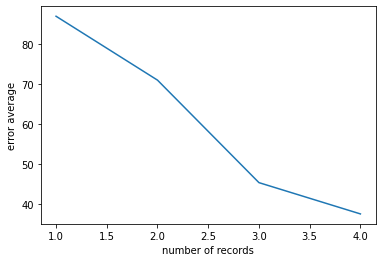

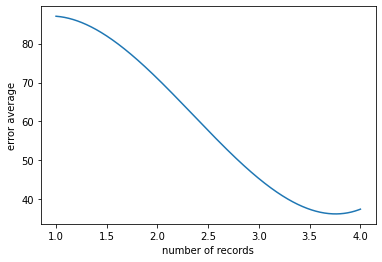

In [83]:
from scipy.interpolate import make_interp_spline

x = np.array([1, 2, 3, 4])
y = np.array([dist(coor0_estimations[0], real_coor(0)),
              (dist(coor0_estimations[1], real_coor(0))+dist(coor1_estimations[0], real_coor(1)))/2,
              (dist(coor0_estimations[2], real_coor(0))+dist(coor1_estimations[1], real_coor(1))+dist(coor2_estimations[0], real_coor(2)))/3,
              (dist(coor0_estimations[3], real_coor(0))+dist(coor1_estimations[2], real_coor(1))+dist(coor2_estimations[1], real_coor(2))+dist(coor3_estimations[0], real_coor(3)))/4])
plt.plot(x, y)
plt.xlabel("number of records")
plt.ylabel("error average")
plt.show()

X_Y_Spline = make_interp_spline(x, y)
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
 
# Plotting the Graph
plt.plot(X_, Y_)
plt.xlabel("number of records")
plt.ylabel("error average")
plt.show()

In [ ]:
# extra space

In [ ]:
# extra space